In [12]:
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.optimizers import TFOptimizer
from tensorflow.python.keras.models import load_model
data=np.load("data.npy")
target=np.load("target.npy")

In [13]:
model=Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [14]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1,random_state=1)



In [16]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/5
170/170 [==============================] - 424s 2s/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/5
170/170 [==============================] - 407s 2s/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
170/170 [==============================] - 408s 2s/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/5
170/170 [==============================] - 405s 2s/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
170/170 [==============================] - 404s 2s/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6933 - val_accuracy: 0.5000


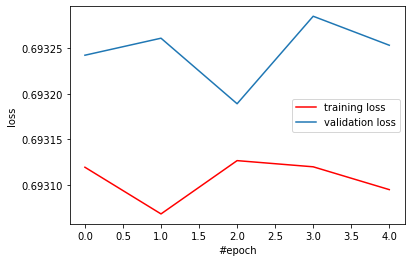

In [17]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

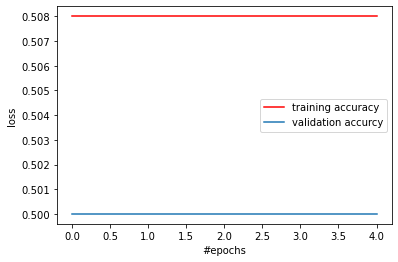

In [18]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accurcy')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()